In [228]:
%%html

<h1>List of chapters in this book:<h1>
<h2>Chapter 9 - Plotting & Visualization</h2>
<h2>Chapter 10 - Data Aggregation and Group Operations</h2>

In [1]:
%%html
<h2>Chapter 9 - Plotting & Visualization</h2>
Code examples are taken from <a href="https://github.com/wesm/pydata-book/blob/3rd-edition/ch09.ipynb">https://github.com/wesm/pydata-book/blob/3rd-edition/ch09.ipynb</a>

In [17]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

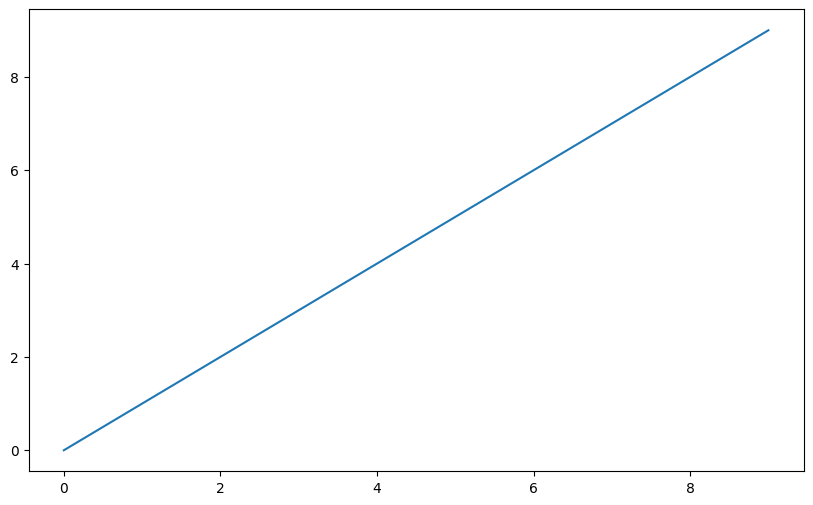

In [18]:
data = np.arange(10)
data
plt.plot(data)

In [32]:
# Plot resides Figure object. Plot figure has a number of options, but notably figzie

In [20]:
# We can't make a plot with a blank figure. You have tot create one or more subplots

In [21]:
fig, axes = plt.subplots(2, 3)
axes

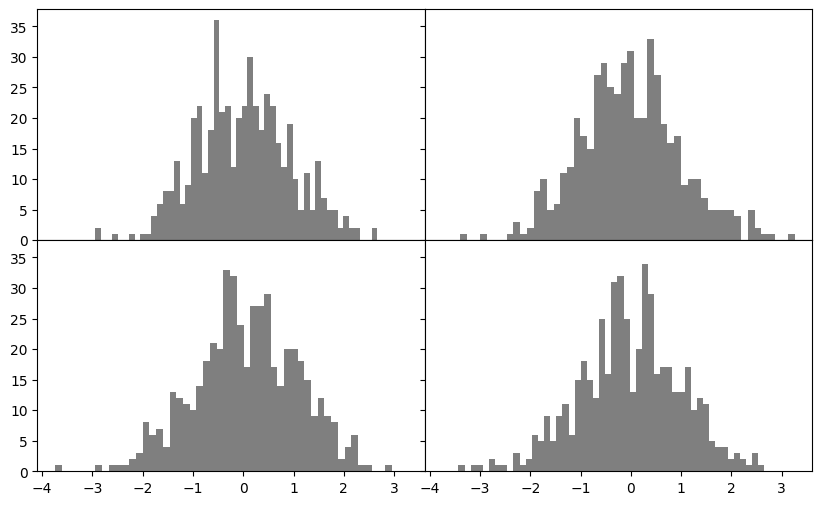

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)


(-20.0, 20.0)

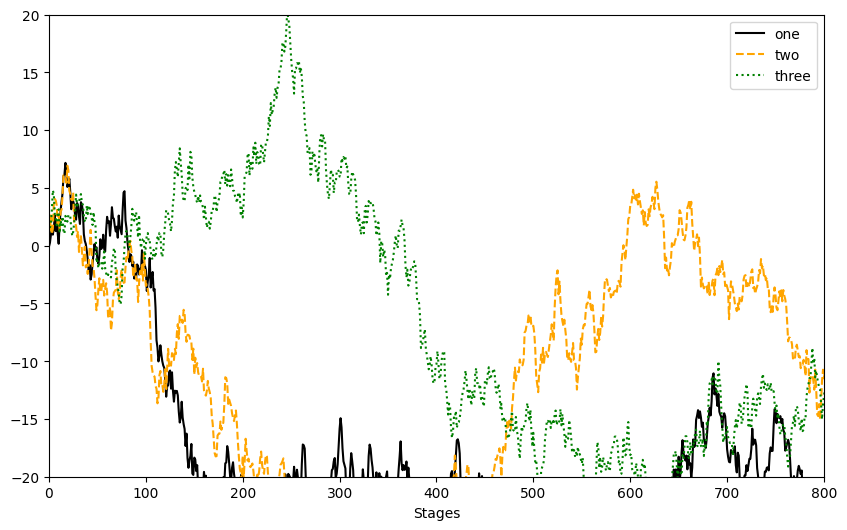

In [54]:
fig, ax = plt.subplots()
#ax.set_xticks([0, 250, 500, 750, 1000])
#ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="orange", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="green", linestyle="dotted",
        label="three");
ax.set_xlabel("Stages")

#Legend
ax.legend()
ax.set_xlim(0, 800)
ax.set_ylim(-20, 20)

In [55]:
# Saving plots to file
fig.savefig("figpath.svg")

In [56]:
%%html
<h3>matplotlib Configuration</h3>

In [58]:
plt.rc("figure", figsize=(10,10))
plt.rc("font", family="monospace", weight="bold", size=8)

In [59]:
%%html
<h3>Plotting with pandas & seaborn</h3>

<Axes: >

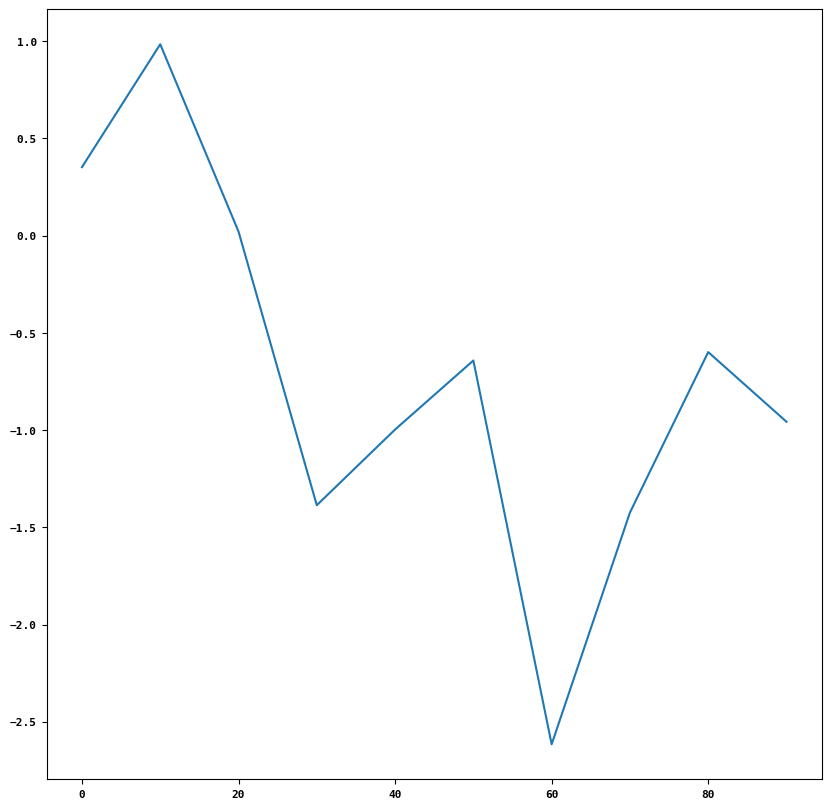

In [60]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

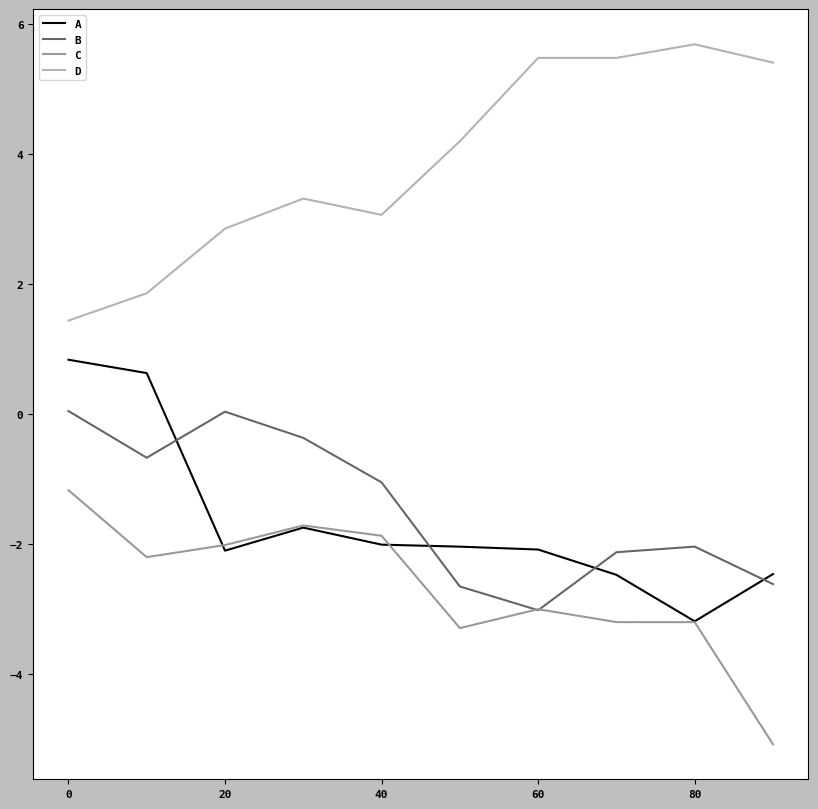

In [61]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

<Axes: >

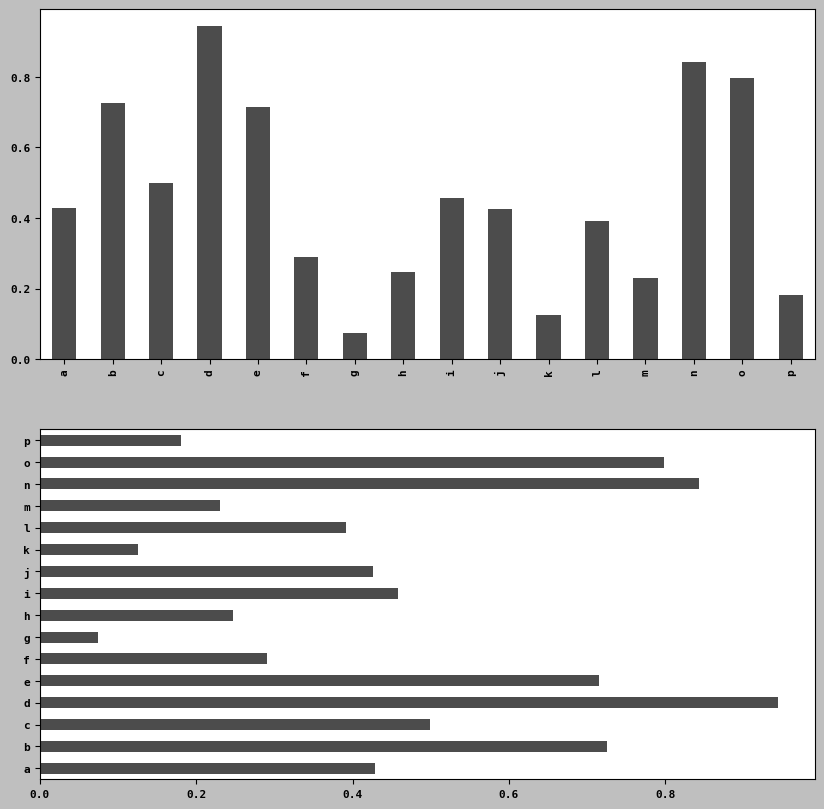

In [63]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [67]:
%%HTML
series.plot method arguments which can be applicable to df as well
<img src="images/series_plot.png" width= 400>

<Axes: >

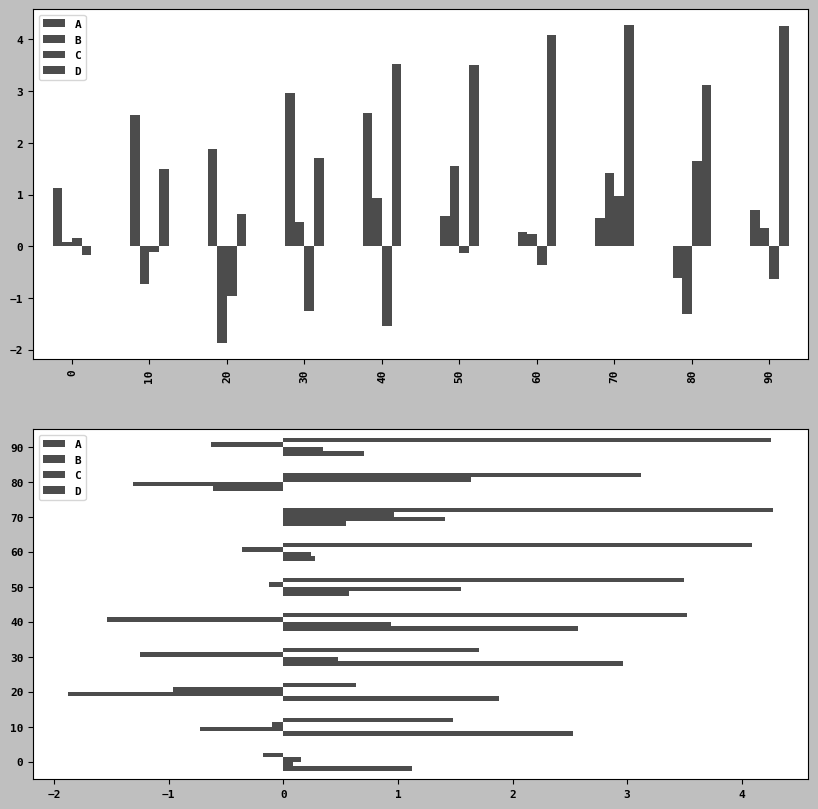

In [66]:
fig, axes = plt.subplots(2, 1)
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot.bar(ax=axes[0], color="black", alpha=0.7)
df.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

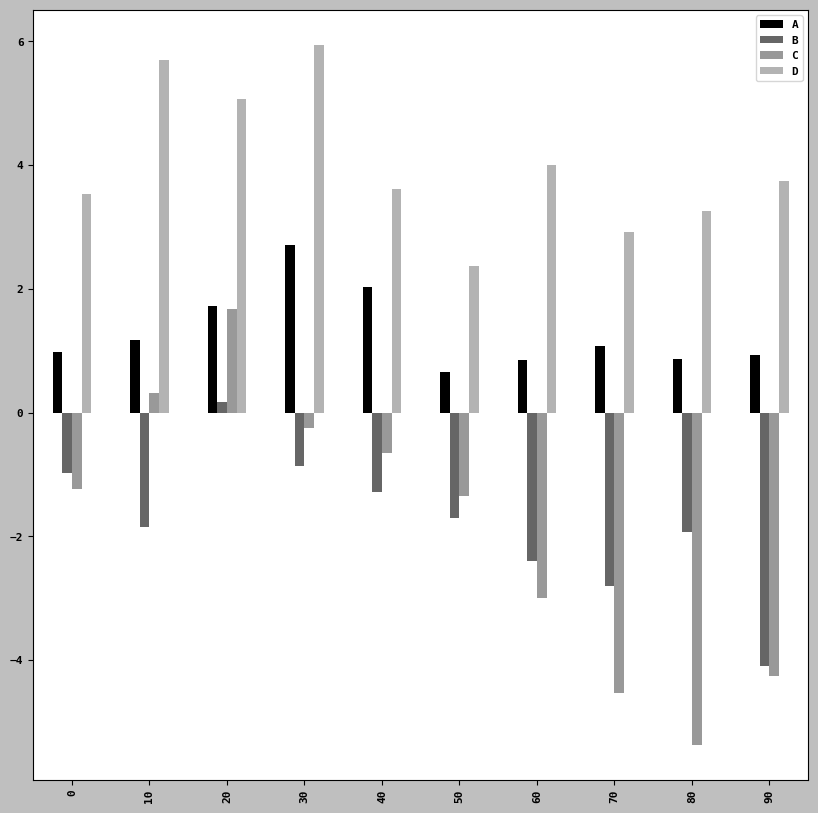

In [68]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot.bar()

In [69]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<Axes: xlabel='tip_pct', ylabel='day'>

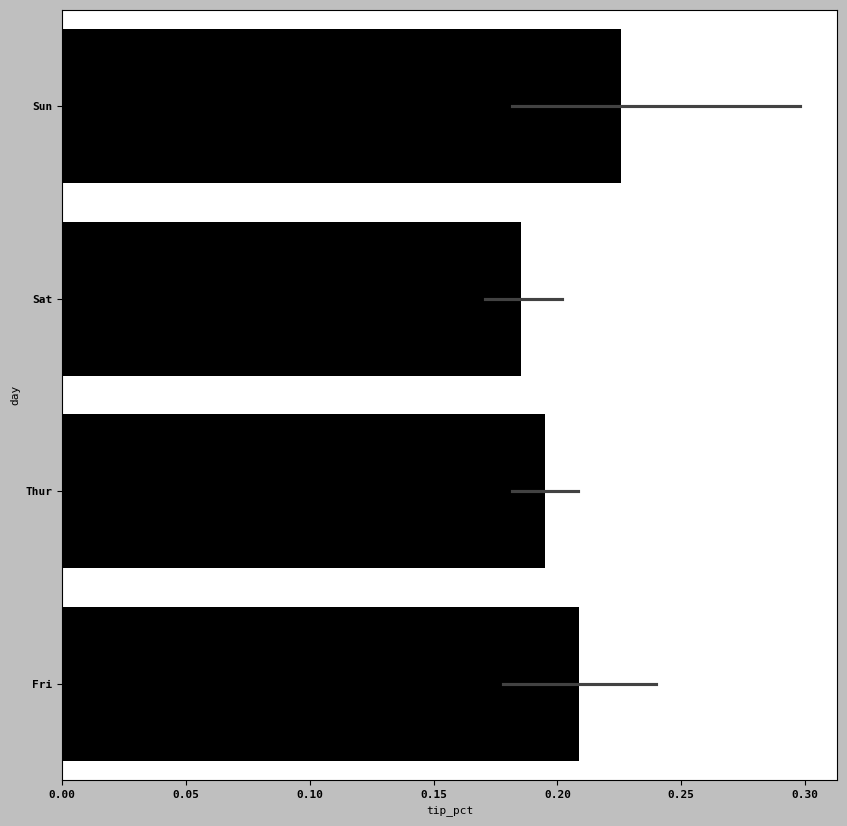

In [72]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [73]:
plt.close("all")

<Axes: ylabel='Frequency'>

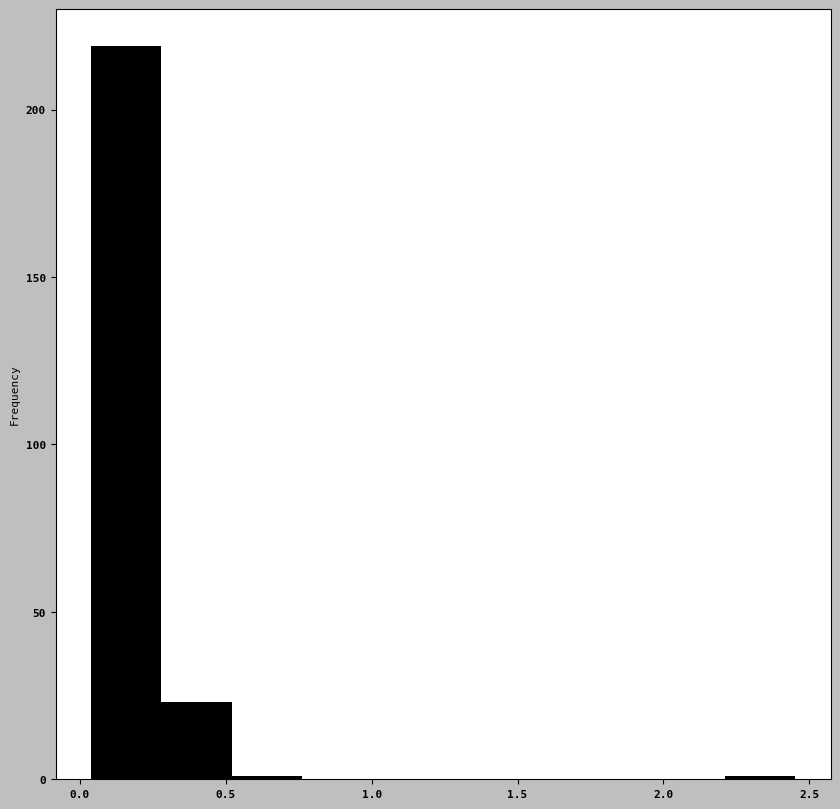

In [74]:
tips["tip_pct"].plot.hist()

<Axes: ylabel='Density'>

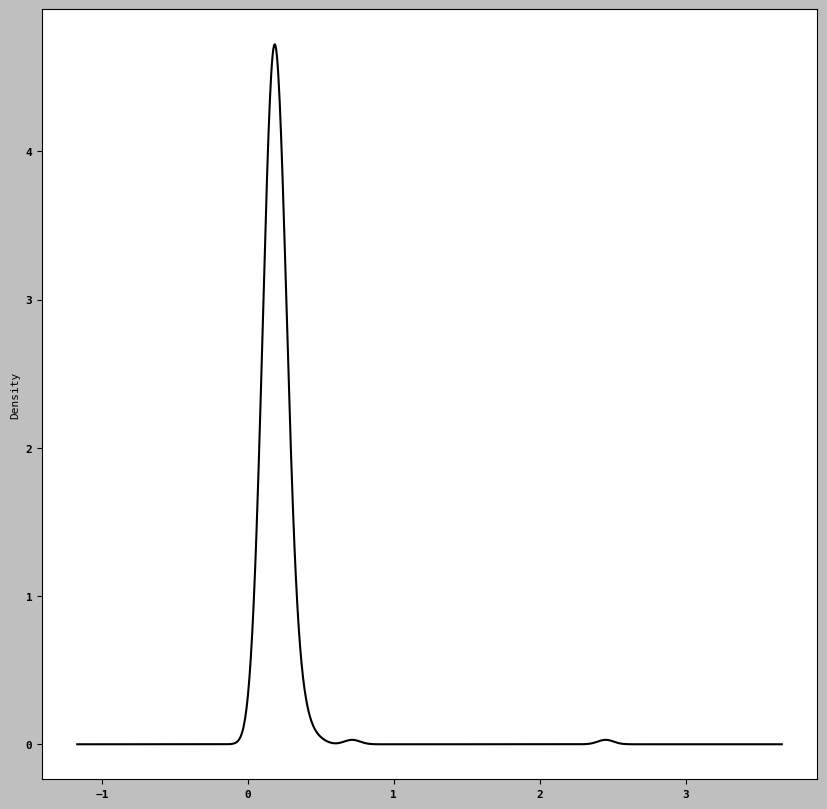

In [76]:
# Kernal density estimate (KDE) plot
tips["tip_pct"].plot.density()

In [77]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


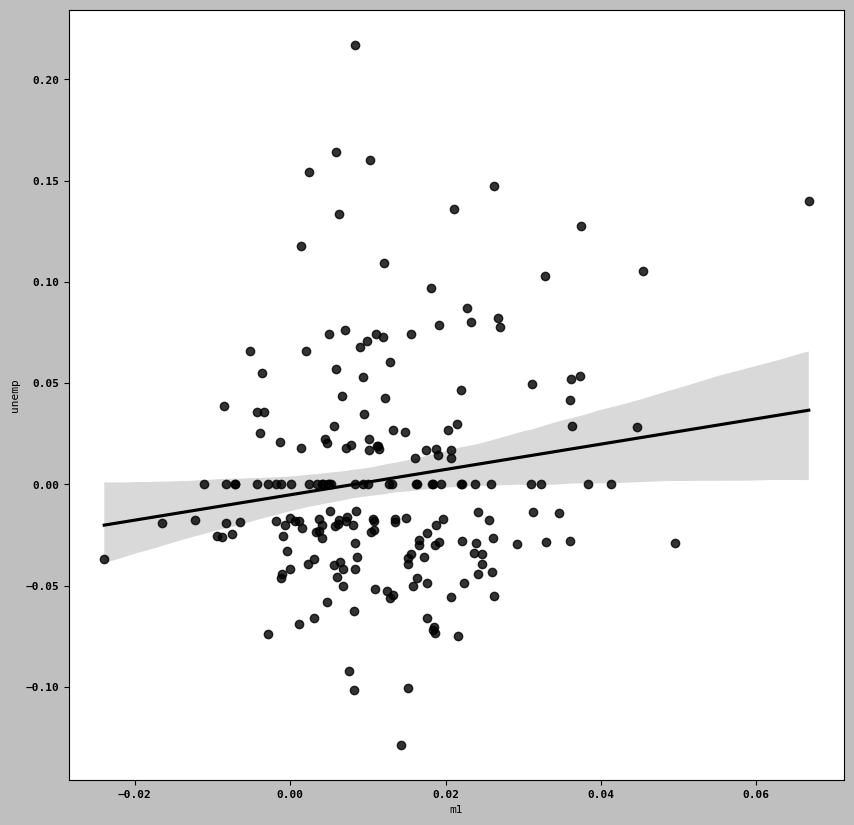

In [80]:
# scatter plot with linear regression line
ax = sns.regplot(x="m1", y="unemp", data=trans_data)

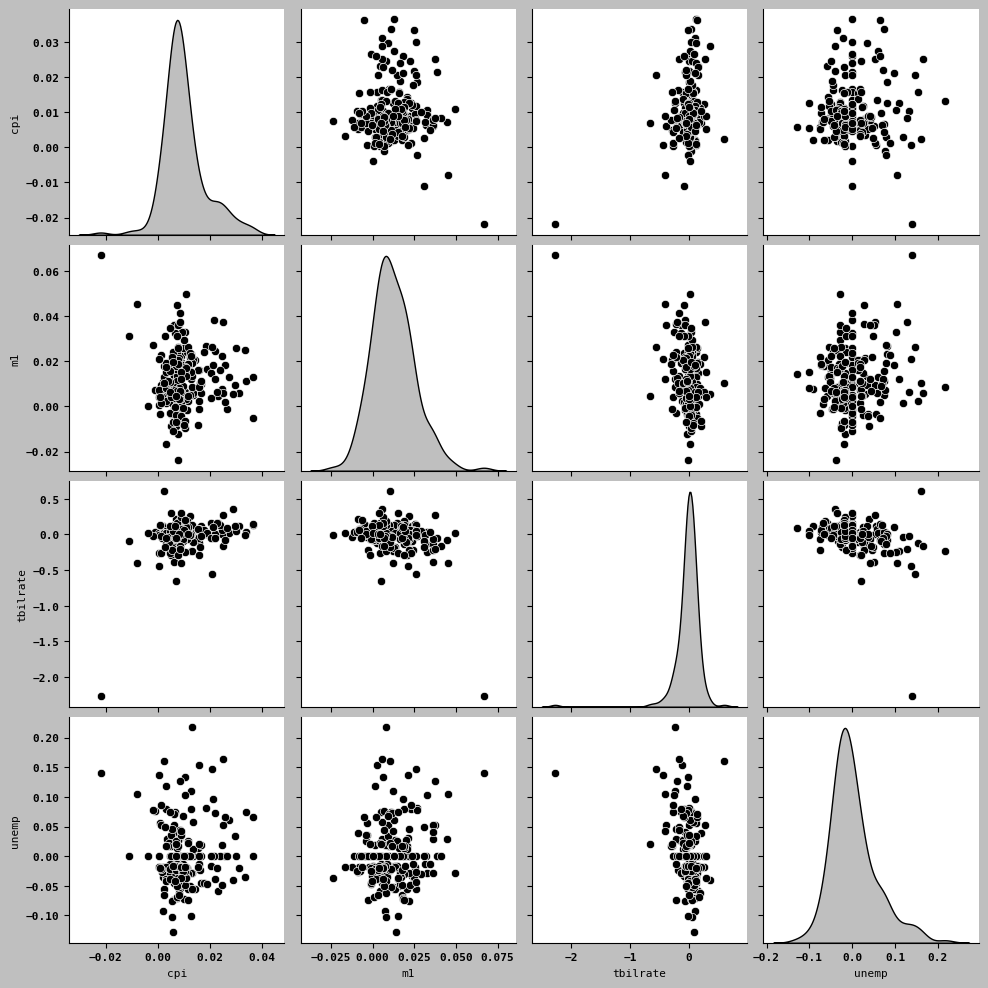

In [81]:
# scatter plot matrxix

sns.pairplot(trans_data, diag_kind="kde")

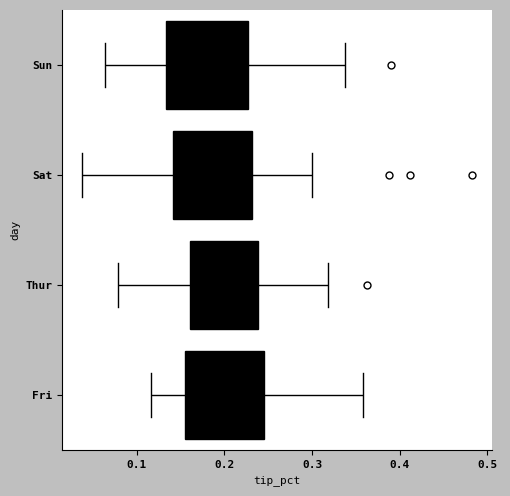

In [82]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

In [87]:
%%html
<h2>Chapter 10 - Data Aggregation and Group Operations</h2>
Code examples are taken from <a href="https://github.com/wesm/pydata-book/blob/3rd-edition/ch10.ipynb">https://github.com/wesm/pydata-book/blob/3rd-edition/ch10.ipynb</a>
<br/>
<br/>
Illustration of group aggregation
<img src="images/group_agg.png" width=400/>

In [88]:
# The group operation can be considered as split-apply-combine = > a series or df split into groups based on one more key. 
# The splitting is performed on a particular axis of the object.
# Once it's done, a function is applied to each group, producing a new value. 
# Finally all the results are combined into a result object.

In [106]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [107]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [108]:
mean = df.groupby("key1").mean()

In [109]:
mean

,key2,data1,data2
key1,,,
a,1.5,0.555881,0.441920
b,1.5,0.705025,-0.144516


In [111]:
df['data1'].groupby(df["key1"]).mean()

key1
a    0.555881
b    0.705025
Name: data1, dtype: float64

In [112]:
# We can pass multiple keys
df.groupby(["key1","key2"]).mean()


data1     data2
key1 key2                    
a    1    -0.204708  0.281746
     2     0.478943  0.769023
b    1     1.965781 -1.296221
     2    -0.555730  1.007189

In [113]:
df.groupby(["key1","key2"]).size() # similar to count(*) in SQL

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [114]:
df.groupby(["key1","key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [119]:
df.groupby(["key1","key2"]).count() # similar to aize in pandas & count(*) in SQL, but it only takes the nonnull values in each group.

data1  data2
key1 key2              
a    1         1      1
     2         1      1
b    1         1      1
     2         1      1

In [120]:
%%html
<h2>Iterating over groups</h2>

In [123]:
for name, group in df.groupby("key1"):
    print(group)
    print("hello")

  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
1    a     2  0.478943  0.769023
5    a  <NA>  1.393406  0.274992
hello
  key1  key2     data1     data2
3    b     2 -0.555730  1.007189
4    b     1  1.965781 -1.296221
hello


In [130]:
%%html
<h3>Selecting a column or subset of columns</h3>

In [136]:
grouped = df.groupby(["key1","key2"])['data1'].mean()
grouped

key1  key2
a     1      -0.204708
      2       0.478943
b     1       1.965781
      2      -0.555730
Name: data1, dtype: float64

In [137]:
%%html
<h3>Grouping with Dictionaries & Series</h3>

In [138]:
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [139]:
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e": "red", "f" : "orange"}

In [143]:
by_column = people.groupby(mapping, axis="columns")
by_column.sum()

/tmp/ipykernel_45502/2628240624.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  by_column = people.groupby(mapping, axis="columns")


,blue,red
Joe,-2.373480,3.908371
Steve,3.725929,-1.999539
Wanda,0.523772,-0.576147
Jill,-3.201385,-1.230495
Trey,-1.146107,-1.364125


In [144]:
by_column.sum()

,blue,red
Joe,-2.373480,3.908371
Steve,3.725929,-1.999539
Wanda,0.523772,-0.576147
Jill,-3.201385,-1.230495
Trey,-1.146107,-1.364125


In [146]:
%%html
<h3>Grouping by index levels</h3>

In [147]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                    [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])
hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.332883 -2.359419 -0.199543 -1.541996 -0.970736
1     -1.307030  0.286350  0.377984 -0.753887  0.331286
2      1.349742  0.069877  0.246674 -0.011862  1.004812
3      1.327195 -0.919262 -1.549106  0.022185  0.758363

In [149]:
hier_df.groupby(level="cty", axis=1).count()

/tmp/ipykernel_45502/84208998.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hier_df.groupby(level="cty", axis=1).count()


cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [150]:
%%html
<h3>Data aggregation</h3>

In [158]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [162]:
grouped = df.groupby("key1")
grouped.sum()

,key2,data1,data2
key1,,,
a,3,1.667642,1.325760
b,3,1.410050,-0.289032


In [157]:
# We can use our own aggregation function
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.598113,0.494031
b,1,2.521511,2.303410


In [163]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.555881  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.705025  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.936175  1.393406   3.0  0.441920  0.283299  0.274992  0.278369   
b     1.335403  1.965781   2.0 -0.144516  1.628757 -1.296221 -0.720368   

                                    
           50%       75%       max  
key1                                
a     0.281746  0.525384  0.769023  
b    -0.144516  0.431337  1.007189  

[2 rows x 24 columns]

In [224]:
%%html
<h3>Column-wise and multiple function application</h3>
groupby methods
<img src="images/groupby_methods1.png" width=400>
<img src="images/groupby_methods2.png" width=400>

In [165]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [166]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [174]:
grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [176]:
# We can pass list of functions
grouped_pct.agg(["mean","count",peak_to_peak])

mean  count  peak_to_peak
day  smoker                               
Fri  No      0.151650      4      0.067349
     Yes     0.174783     15      0.159925
Sat  No      0.158048     45      0.235193
     Yes     0.147906     42      0.290095
Sun  No      0.160113     57      0.193226
     Yes     0.187250     19      0.644685
Thur No      0.160298     45      0.193350
     Yes     0.163863     17      0.151240

In [177]:
# We can name them as well

grouped_pct.agg([("Average","mean"),("Size","count"),("Peak to Peak",peak_to_peak)])

Average  Size  Peak to Peak
day  smoker                              
Fri  No      0.151650     4      0.067349
     Yes     0.174783    15      0.159925
Sat  No      0.158048    45      0.235193
     Yes     0.147906    42      0.290095
Sun  No      0.160113    57      0.193226
     Yes     0.187250    19      0.644685
Thur No      0.160298    45      0.193350
     Yes     0.163863    17      0.151240

In [179]:
grouped[["tip_pct","total_bill"].agg([("Average","mean"),("Size","count"),("Peak to Peak",peak_to_peak)])

tip_pct                   total_bill                  
              Average Size Peak to Peak    Average Size Peak to Peak
day  smoker                                                         
Fri  No      0.151650    4     0.067349  18.420000    4        10.29
     Yes     0.174783   15     0.159925  16.813333   15        34.42
Sat  No      0.158048   45     0.235193  19.661778   45        41.08
     Yes     0.147906   42     0.290095  21.276667   42        47.74
Sun  No      0.160113   57     0.193226  20.506667   57        39.40
     Yes     0.187250   19     0.644685  24.120000   19        38.10
Thur No      0.160298   45     0.193350  17.113111   45        33.68
     Yes     0.163863   17     0.151240  19.190588   17        32.77

In [183]:
# We can also pass a dictionary to agg
grouped.agg({"tip" : np.max, "size" : "sum"})

/tmp/ipykernel_45502/1179710144.py:2: FutureWarning: The provided callable <function max at 0x7f163c0fb060> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped.agg({"tip" : np.max, "size" : "sum"})


tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [191]:
%%html
<h3>Apply: General split-apply-combine</h3>

In [188]:
grouped = tips.groupby(["day", "smoker"])
grouped.mean(numeric_only=True)


total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [189]:
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [190]:
tips.groupby("smoker").apply(top)

/tmp/ipykernel_45502/2530541573.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby("smoker").apply(top)


total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [192]:
%%html
<h3>Qunatile and Bucket Analysis</h3>

In [193]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
                      "data2": np.random.standard_normal(1000)})
frame.head()
quartiles = pd.cut(frame["data1"], 4)
quartiles.head(10)

0     (-1.23, 0.489]
1     (0.489, 2.208]
2     (-1.23, 0.489]
3     (-1.23, 0.489]
4     (0.489, 2.208]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8    (-2.956, -1.23]
9     (-1.23, 0.489]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [194]:
def get_stats(group):
    return pd.DataFrame(
        {"min": group.min(), "max": group.max(),
        "count": group.count(), "mean": group.mean()}
    )

grouped = frame.groupby(quartiles)
grouped.apply(get_stats)

/tmp/ipykernel_45502/2015905501.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = frame.groupby(quartiles)


min       max  count      mean
data1                                                     
(-2.956, -1.23] data1 -2.949343 -1.230179     94 -1.658818
                data2 -3.399312  1.670835     94 -0.033333
(-1.23, 0.489]  data1 -1.228918  0.488675    598 -0.329524
                data2 -2.989741  3.260383    598 -0.002622
(0.489, 2.208]  data1  0.489965  2.200997    298  1.065727
                data2 -3.745356  2.954439    298  0.078249
(2.208, 3.928]  data1  2.212303  3.927528     10  2.644253
                data2 -1.929776  1.765640     10  0.024750

In [197]:
# Filling the null values
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]
group_key = ["East", "East", "East", "East",
             "West", "West", "West", "West"]
data = pd.Series(np.random.standard_normal(8), index=states)
data[["Vermont", "Nevada", "Idaho"]] = np.nan
data

Ohio          1.105913
New York     -1.613716
Vermont            NaN
Florida       0.406510
Oregon        0.359244
Nevada             NaN
California   -1.691656
Idaho              NaN
dtype: float64

In [198]:
data.groupby(group_key).count()

East    3
West    2
dtype: int64

In [199]:
def fill_mean(group):
    return group.fillna(group.mean())

data.groupby(group_key).apply(fill_mean)


East  Ohio          1.105913
      New York     -1.613716
      Vermont      -0.033764
      Florida       0.406510
West  Oregon        0.359244
      Nevada       -0.666206
      California   -1.691656
      Idaho        -0.666206
dtype: float64

In [200]:
%%html
<h3>Group wise linear regression</h3>

In [203]:
close_px = pd.read_csv("examples/stock_px.csv", parse_dates=True,
                       index_col=0)
close_px.info()
close_px.tail(4)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [201]:
import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [205]:
def spx_corr(group):
    return group.corrwith(group["SPX"])
rets = close_px.pct_change().dropna()

In [207]:
def get_year(x):
    return x.year

by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [208]:
def corr_aapl_msft(group):
    return group["AAPL"].corr(group["MSFT"])
by_year.apply(corr_aapl_msft)

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [209]:
by_year.apply(regress, yvar="AAPL", xvars=["SPX"])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [227]:
%%html
Pivot table options
<img src="images/pivot_table_options.png" width=400>

In [210]:
# Pivot table
tips.head()
tips.pivot_table(index=["day", "smoker"],
                 values=["size", "tip", "tip_pct", "total_bill"])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [211]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [212]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [213]:
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="tip_pct", aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [214]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct", fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
...                      ...       ...       ...       ...
Lunch  3    Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

In [216]:
from io import StringIO
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep="\s+")
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [220]:
data.pivot_table(index="Nationality",columns="Handedness", aggfunc="count", margins=True)

Sample                 
Handedness  Left-handed Right-handed All
Nationality                             
Japan                 2            3   5
USA                   1            4   5
All                   3            7  10

In [221]:
# We can do above using crosstab
pd.crosstab(data["Nationality"], data["Handedness"], margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10
